# Introduction to mathematical statistics 

Welcome to the lecture 12 in 02403

During the lectures we will present both slides and notebooks. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

### Example: CI for exponential rate or mean

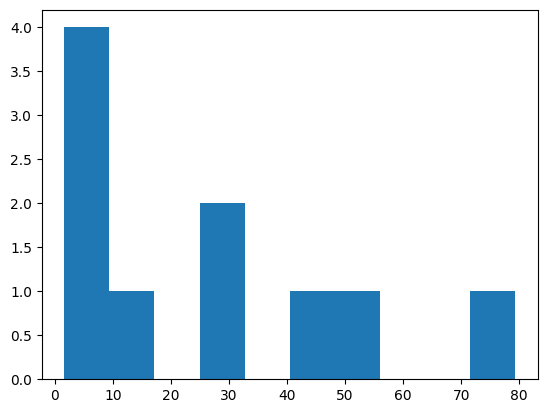

In [51]:
wait_times = np.array([32.6, 1.6, 42.1, 29.2, 53.4, 79.3, 2.3, 4.7, 13.6, 2.0])

plt.hist(wait_times)
plt.show()

We think the underlying distribution is an exponential distribution

In [52]:
# lets compute the mean from the data: 
print(wait_times.mean())

26.080000000000002


In [53]:
# calculate the average rate:
lamb = 1/wait_times.mean()
print(lamb)

0.03834355828220859


Parametric bootstrap

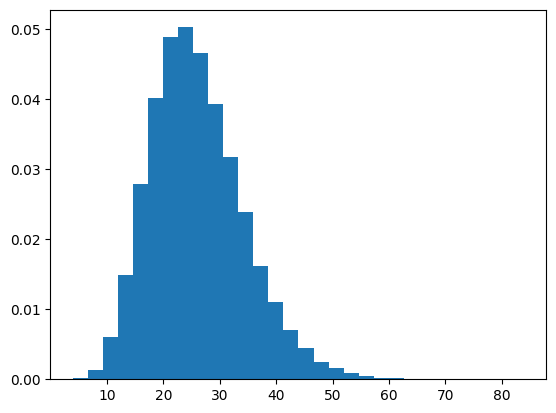

array([[ 2.96495993,  4.43628773, 24.48763239, ..., 16.73287127,
        15.94850856, 21.62056837],
       [ 9.04572614, 58.89290713, 33.33033185, ...,  0.53766852,
         9.19729711, 25.62373394],
       [11.1425948 , 10.781019  , 95.7625212 , ...,  1.69305451,
        22.98697186,  8.08183043],
       ...,
       [ 1.10549793,  5.73772725, 15.63935791, ..., 14.34766344,
        13.23584009, 78.22722848],
       [ 7.83029244, 13.21329698, 13.71433202, ..., 17.84169249,
         1.30279392, 16.05568805],
       [42.7090726 ,  3.28390998, 10.9779512 , ..., 19.01209514,
        39.59550638, 13.91474392]])

In [54]:
# Now do 100000 simulations
k = 100000
sim_wait_times = stats.expon.rvs(size=(k,10), scale=1/lamb)

# for each simulation we calculate the mean:
sim_means = sim_wait_times.mean(axis=1)

# now we plot a histogram of all the (100000) mean values
plt.hist(sim_means, density=True, bins=30)
plt.show()
sim_wait_times

For each simulation we had n = 10. 

This is not very large and CLT does not apply - we also see in the plot above that the distribution of the means does not look like a normal distribution

(according to the CLT it should approach a normal distribution as n increases - try this yourself. How large do YOU think n should be? Do you agree that maybe n>30 is not always enough?)

In [55]:
# From simulated means we can find the 95% CI for the mean:
CI = np.percentile(sim_means, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI)

[12.48394811 44.46039936]


We just made a simulation based confidence interval for the mean :-)

### Without distribution assumption

In [56]:
# First lets try to simulate 5 more samples by re-sampling the original data:

sim_data = np.random.choice(wait_times,size=(len(wait_times), 5))
print(sim_data)

[[53.4 79.3 53.4 79.3 79.3]
 [ 2.3  2.3 79.3 13.6 42.1]
 [ 2.3 32.6 13.6  2.   1.6]
 [29.2 53.4 13.6  4.7  2. ]
 [ 2.   2.3 32.6 79.3 79.3]
 [32.6  2.  32.6 13.6  2. ]
 [79.3  4.7 53.4 13.6 53.4]
 [ 2.3 53.4 13.6 79.3 79.3]
 [79.3 42.1  2.3 29.2 13.6]
 [42.1 79.3 42.1 13.6 53.4]]


[11.71 42.44]


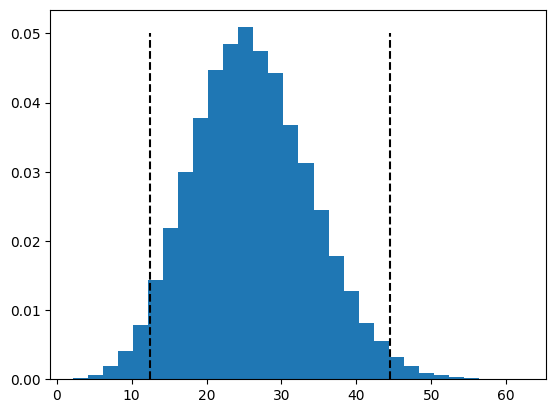

In [57]:
# Now simulate MANY more samples (by re-sapling the original data many times):
k = 100000
sim_data = np.random.choice(wait_times,size=(len(wait_times), k))

# calculate mean of each sample:
sim_means = sim_data.mean(axis=0)

# caluclate the 95% CI from the samples:
CI_nonpar = np.percentile(sim_means, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI_nonpar)

# always visualise :-)
plt.hist(sim_means, density=True,bins=30)
plt.plot([CI[0], CI[0]], [0,.05], '--', color="black")
plt.plot([CI[1], CI[1]], [0,.05], '--', color="black")
plt.show()

In [60]:
CI

array([12.48394811, 44.46039936])

### Example: Simulation of difference between two samples

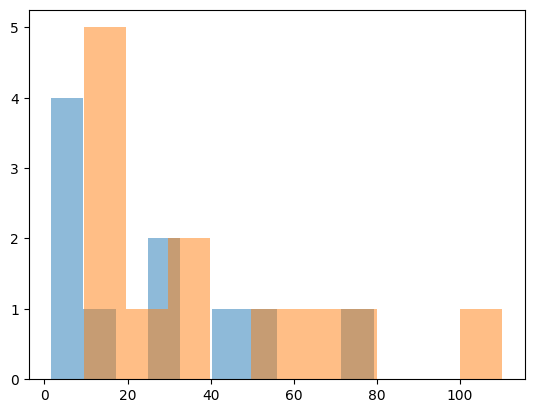

In [61]:
# Callcenter - now from two different days. 
# We want to know if there is a significant difference in the average 
# waiting time between calls for the two days. 

# Data day 1
x = np.array([32.6, 1.6, 42.1, 29.2, 53.4, 79.3, 2.3 , 4.7, 13.6, 2.0])
n1 = len(x)

# Data day 2
y = np.array([9.6, 22.2, 52.5, 12.6, 33.0, 15.2, 76.6, 36.3, 110.2, 18.0, 62.4, 10.3])
n2 = len(y)

# always visualise :-)
plt.hist(x, alpha=.5)
plt.hist(y, alpha=.5)
plt.show()

We will assume that both samples come from underlying exponential distributions (but with different means)

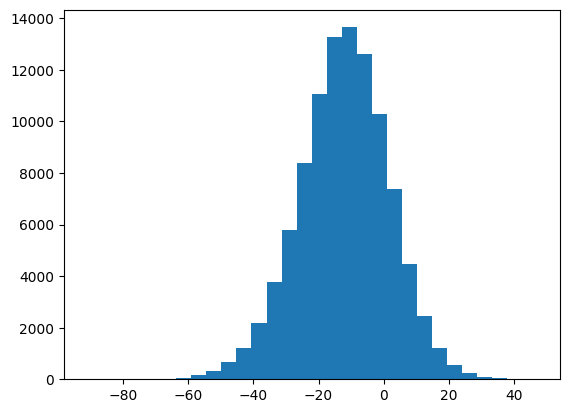

In [62]:
# simulate k samples of size n1 and n2

k = 100000

x_sim = stats.expon.rvs(size=(n1,k), scale=x.mean())
y_sim = stats.expon.rvs(size=(n2,k), scale=y.mean())

x_means = x_sim.mean(axis=0)
y_means = y_sim.mean(axis=0)

diffs = x_means - y_means

plt.hist(diffs, bins=30)
plt.show()

In [63]:
# find 95% confidence interval for the difference
CI = np.percentile(diffs, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI)

[-40.53449269  13.91135617]


Non parametric

In [64]:
# Make simulations:
k = 100000

sim_x = np.random.choice(x,size=(len(x),k))
sim_y = np.random.choice(y,size=(len(y),k))

# calculate difference of means in simulated data:
sim_mean_dif = sim_x.mean(axis=0) - sim_y.mean(axis=0)

# calculate the 95% CI:
CI = np.percentile(sim_mean_dif, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI)

[-35.47166667  10.7       ]


## Inference for proportions


### Example: Normal approximation of the binomial distribution

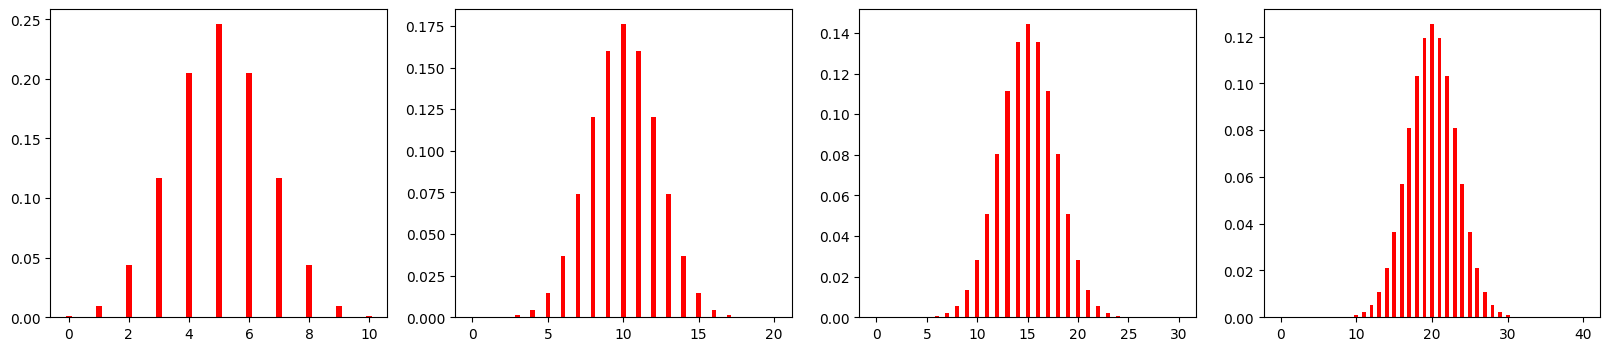

In [65]:

p = 1/2

fig, axs = plt.subplots(1, 4, figsize=(20,4))

# Plot binomial distribution for n = 10
n = 10
axs[0].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.2, color='red')

# Plot binomial distribution for n = 20
n = 20
axs[1].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.3, color='red')

# Plot binomial distribution for n = 30
n = 30
axs[2].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.4, color='red')

# Plot binomial distribution for n = 40
n = 40
axs[3].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.5, color='red')

plt.show()

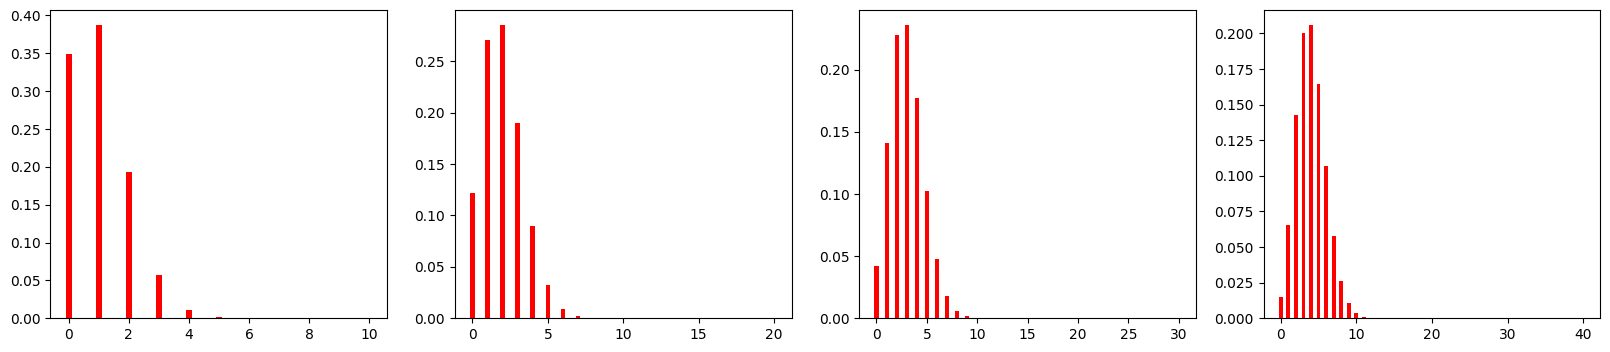

In [66]:
# Lets plot some binomial distributions with p = 0.10 and an increasing number of observations (n)

fig, axs = plt.subplots(1, 4, figsize=(20,4))

p = 1/10

# Again for n = 10,20,30,40
n = 10
axs[0].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.2, color='red')
n = 20
axs[1].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.3, color='red')
n = 30
axs[2].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.4, color='red')
n = 40
axs[3].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.5, color='red')
plt.show()

Sample size determination and marginn of error (from pole)

In [67]:
p = 0.5
z = stats.norm.ppf(0.975)
n = 1582
z * np.sqrt(p*(1-p)/n) #ME

np.float64(0.02463853355540394)

In [68]:
ME = 0.01
p * (1 - p)*(z / ME)**2 ## Sample size

np.float64(9603.647051735312)

### Example: Confidence interval for one porportion

In [69]:
n = 252  # total number of people in the sample
y = n-58   # number of left-handed in the sample

p_hat = y/n
print(p_hat)

0.7698412698412699


2. **Calculating Standard Error**:  Using the sample proportion calculated, what is the standard error of the proportion for left-handed individuals in this sample?

$ \sigma_{\hat{p}} $ is the standard error of the sample proportion, calculated as $ \sigma_{\hat{p}} = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} $.

In [74]:
# compute the standard error
se_p_hat = np.sqrt(p_hat*(1-p_hat)/n)
print(se_p_hat)

0.026516368790824203


3. **Calculating Confidence Interval** (assuming normal approximation):  Assuming a normal approximation, what is the 95% confidence interval for the proportion of left-handed individuals in the population, based on this sample?

$\hat{p} \pm z_{1-\alpha/2} \sigma_{\hat{p}}$


In [73]:
# compute confidence interval using normal-approximation
print([p_hat - 1.96*se_p_hat, p_hat + 1.96*se_p_hat])

[np.float64(0.7178691870112545), np.float64(0.8218133526712853)]


Hypothesis test 

In [ ]:
(y-1/6*n)/np.sqrt(n*1/6*5/5)

### Example: Contraceptive pills and the risk of blood clots

In [ ]:
# Group using birth control pills:
y1 = 23
n1 = 23 + 34
p1 = y1/n1
print(p1)

In [ ]:
# Group not using birth control pills (control group):
y2 = 35
n2 = 35 + 132
p2 = y2/n2
print(p2)

In [ ]:
# difference between groups:
diff = p1-p2
print(diff)

In [ ]:
# confidence interval for diff:
se_diff = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)

print([diff - 1.96*se_diff, diff + 1.96*se_diff])

In [ ]:
###### Test for equal proportions in the two groups:
# We saw from the interval above that 0.5 was not in the interval. So what do we expect here?

z_obs,p_value = smprop.proportions_ztest(count = [23, 35], nobs = [57, 167], value=0, prop_var=0)
print(z_obs, p_value)

**Hypothesis Test for Two Proportions**  
When comparing two proportions (shown here for a two-sided alternative hypothesis):

$
H_0 : \; p_1 = p_2,
$
$
H_1 : \; p_1 \neq p_2.
$

**Use the test statistic**

$
z_{\text{obs}} = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}},
$
where $\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}$.

In [ ]:
# *Manual* calculations for the same test: 
p_pooled = (y1+y2)/(n1+n2)
print("p_hat or p_pooled:", p_pooled)

In [ ]:
# test statistic
z_obs = diff / np.sqrt(p_pooled*(1-p_pooled)*(1/n1 + 1/n2))
print("Test statistic or z_obs:", z_obs)

In [ ]:
# p-value
print("p-value:", 2 * stats.norm.cdf(-z_obs, loc=0, scale=1))

### Example: Contraceptive pills with $\chi^2$

In [ ]:
# The data in a table:
table_data = np.array([[23,35],[34,132]])
print(table_data)
pill_study = pd.DataFrame(table_data, index=['Blood Clot', 'No Clot'], columns=['Pill', 'No pill'])
# With pandas we can make a better table:
display(pill_study)

In [ ]:
# this function can take either a pandas table or the data (so both table_data and pill_study)
chi2, p_val, dof, (expected) = stats.chi2_contingency(pill_study, correction=False)
# returns test statistic, p-value, degrees of freedom, and expected frequencies

In [ ]:
print(expected) # expected frequencies under the null hypothesis

In [ ]:
print("Chi-square test statistic:", chi2)

In [ ]:
print("P-value:", p_val)

In [ ]:
print(dof)

### Example: Candidate votes over time

In [ ]:
# First put data into a pandas dataframe
poll = np.array([[79, 91, 93], [84, 66, 60], [37, 43, 47]])
print(poll)
poll_df = pd.DataFrame(poll, index=['Cand1', 'Cand2', 'Undecided'], columns = ['4 weeks', '2 weeks', '1 week'])
display(poll_df)

Row 1: votes for Candidate 1 (4, 2 and 1 week(s) before the election) <br>
Row 1: votes for Candidate 2 (4, 2 and 1 week(s) before the election) <br>
Row 1: undecided votes       (4, 2 and 1 week(s) before the election) <br>

In [ ]:
# calculate total number of people asked at every sample / timepoint:
print(np.sum(poll, axis=0))

In [ ]:
# total number for each candidate across all three timepoints:
print(np.sum(poll, axis=1))

This is the overall distribution of votes. 

We want to know if the distributions of votes within each timepoint (sample) differs significantly from the overall distribution.

In [ ]:
# Now do the chi2 test:
# Again, we can use either the data or the pandas dataframe as input 
chi2, p_val, dof, expected = stats.chi2_contingency(poll, correction=False)

In [ ]:
print(expected) # Expected under the assumption that the null hypothesis is true (all distributions are the same)

In [ ]:
print(chi2)

In [ ]:
print(p_val)

In [ ]:
print(dof)